In [1]:
import pandas as pd
from pandas import DataFrame as df

In [2]:
movies_df=pd.read_csv("movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
len(movies_df)

9742

In [4]:
len(movies_df.index)

9742

In [5]:
movies_df.shape

(9742, 3)

In [6]:
movies_df['genre_arr']=movies_df['genres'].str.split('|')

In [7]:
movies_df.head()

,movieId,title,genres,genre_arr
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [8]:
entertainer_lambda= lambda x:set(['Romance','Action','Comedy','Thriller']).issubset(x)
entertainer_movies=movies_df[movies_df.genre_arr.map(entertainer_lambda)]
print('#no of enertainment movies', len(entertainer_movies.index))
entertainer_movies

#no of enertainment movies 6


,movieId,title,genres,genre_arr
337,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
1856,2468,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller,"[Action, Comedy, Romance, Thriller]"
3460,4719,Osmosis Jones (2001),Action|Animation|Comedy|Crime|Drama|Romance|Th...,"[Action, Animation, Comedy, Crime, Drama, Roma..."
3608,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller,"[Action, Adventure, Comedy, Drama, Romance, Th..."
4445,6564,Lara Croft Tomb Raider: The Cradle of Life (2003),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
5774,31367,"Chase, The (1994)",Action|Adventure|Comedy|Crime|Romance|Thriller,"[Action, Adventure, Comedy, Crime, Romance, Th..."


In [9]:
counter_lambda=lambda x: len(x)
movies_df['genres_count']=movies_df.genre_arr.apply(counter_lambda)
movies_df.head()

,movieId,title,genres,genre_arr,genres_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1


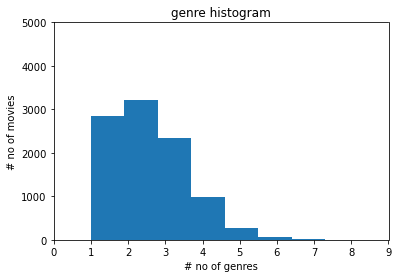

In [10]:

import matplotlib.pyplot as plt
plt.hist(movies_df.genres_count)
plt.title("genre histogram")
plt.xlabel("# no of genres")
plt.ylabel("# no of movies")
plt.axis([0,9,0,5000])
plt.show()

In [11]:
#to see how many movies are there for each genre
from collections import Counter
flattend_genres=[item for sublist in movies_df.genre_arr for item in sublist]
genre_dict=dict(Counter(flattend_genres))
print(genre_dict)

{'Adventure': 1263, 'Animation': 611, 'Children': 664, 'Comedy': 3756, 'Fantasy': 779, 'Romance': 1596, 'Drama': 4361, 'Action': 1828, 'Crime': 1199, 'Thriller': 1894, 'Horror': 978, 'Mystery': 573, 'Sci-Fi': 980, 'War': 382, 'Musical': 334, 'Documentary': 440, 'IMAX': 158, 'Western': 167, 'Film-Noir': 87, '(no genres listed)': 34}


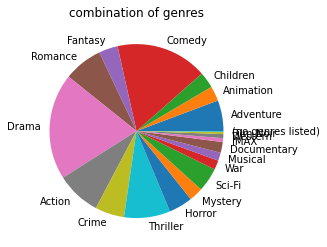

In [12]:
#plot the pie chart of genres 
plt.pie(genre_dict.values(),labels=genre_dict.keys())
plt.title("combination of genres")
plt.show()

[]

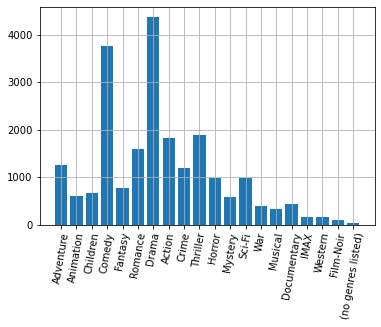

In [13]:
#plot a bar chart
x=list(range(len(genre_dict)))
plt.xticks(x, genre_dict.keys(),rotation=80)
plt.bar(x,genre_dict.values())
plt.grid()
plt.plot()

In [14]:
#now to moving rating  data
rating_df=pd.read_csv('ratings.csv')
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
print ('# ratings', len(rating_df.index))

# ratings 100836


In [16]:
#how many diff movies hvae been rated
print('#movies', len(rating_df.movieId.unique()))

#movies 9724


In [17]:
#unique rating vales
print('#ratings', rating_df.rating.unique())

#ratings [4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]


In [18]:
#now performing stats on data for that import numpy

import numpy as np


In [19]:
np.mean(rating_df.rating)

3.501556983616962

In [20]:
np.median(rating_df.rating)

3.5

In [21]:
#percentile of data
np.percentile(rating_df.rating, 30)

3.0

In [22]:
from scipy import stats
stats.mode(rating_df.rating)

ModeResult(mode=array([4.]), count=array([26818]))

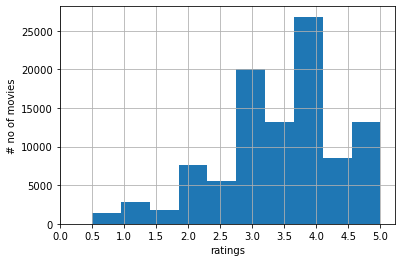

In [23]:
#histogram of movie rating

plt.hist(rating_df.rating)
plt.xticks([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
plt.xlabel('ratings')
plt.ylabel('# no of movies')
plt.grid()
plt.show()

In [24]:
#find thr highest rated movie
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [25]:
rating_view=rating_df[['movieId','rating']]
rating_view.groupby(['movieId'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,rating
7638,88448,5.0
8089,100556,5.0
9065,143031,5.0
9076,143511,5.0
9078,143559,5.0
4245,6201,5.0
8136,102217,5.0
8130,102084,5.0
4240,6192,5.0
9104,145994,5.0


In [26]:
merged_df=pd.merge(rating_df,movies_df,on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genre_arr,genres_count
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5


In [27]:
movies_df.head()

,movieId,title,genres,genre_arr,genres_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",3
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",3
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1


In [28]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [29]:
titles_df=merged_df[['movieId','title','rating']]

titles_df.groupby(['movieId','title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,title,rating
7638,88448,Paper Birds (Pájaros de papel) (2010),5.0
8089,100556,"Act of Killing, The (2012)",5.0
9065,143031,Jump In! (2007),5.0
9076,143511,Human (2015),5.0
9078,143559,L.A. Slasher (2015),5.0
4245,6201,Lady Jane (1986),5.0
8136,102217,Bill Hicks: Revelations (1993),5.0
8130,102084,Justice League: Doom (2012),5.0
4240,6192,Open Hearts (Elsker dig for evigt) (2002),5.0
9104,145994,Formula of Love (1984),5.0


In [30]:
len(merged_df[merged_df['movieId']==8848].index)

2

In [31]:
merged_df[merged_df['movieId']==8848]

,userId,movieId,rating,timestamp,title,genres,genre_arr,genres_count
98972,462,8848,3.0,1174690660,"Vitelloni, I (a.k.a. The Young and the Passion...",Drama,[Drama],1
98973,606,8848,4.0,1171311371,"Vitelloni, I (a.k.a. The Young and the Passion...",Drama,[Drama],1


In [32]:
temp_df=titles_df.groupby(['movieId','title'], as_index=False).count()
well_rated_df=temp_df[temp_df['rating']>150].sort_values(by='rating', ascending=False).head(20)
well_rated_df.head()

,movieId,title,rating
314,356,Forrest Gump (1994),329
277,318,"Shawshank Redemption, The (1994)",317
257,296,Pulp Fiction (1994),307
510,593,"Silence of the Lambs, The (1991)",279
1938,2571,"Matrix, The (1999)",278


In [45]:
#CREATE A FILTERED DF ONLY FROM THE MERGED_df which has these movies
filtered_df=merged_df[merged_df['movieId'].apply(lambda x:x in list(well_rated_df['movieId']))]
titles_df=filtered_df[['title','rating','movieId']]
titles_df.groupby(['movieId','title'], as_index=False).mean().sort_values(by='rating',ascending=False).head(20)


,movieId,title,rating
7,318,"Shawshank Redemption, The (1994)",4.429022
18,2959,Fight Club (1999),4.272936
2,50,"Usual Suspects, The (1995)",4.237745
5,260,Star Wars: Episode IV - A New Hope (1977),4.231076
10,527,Schindler's List (1993),4.225000
14,1196,Star Wars: Episode V - The Empire Strikes Back...,4.215640
15,1198,Raiders of the Lost Ark (Indiana Jones and the...,4.207500
6,296,Pulp Fiction (1994),4.197068
16,2571,"Matrix, The (1999)",4.192446
8,356,Forrest Gump (1994),4.164134


In [50]:
#column to add when rating was given

import datetime
year_lambda= lambda x: int(datetime.datetime.fromtimestamp(x).strftime('%Y'))
merged_df['rating_year']=merged_df['timestamp'].apply(year_lambda)
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genre_arr,genres_count,rating_year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,2000
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,1996
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,2005
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,2017
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",5,2011


In [54]:
ratings_per_year=merged_df.groupby(['rating_year'])['rating_year'].count()
ratings_per_year.head()


rating_year
1996     6040
1997     1916
1998      507
1999     2439
2000    10061
Name: rating_year, dtype: int64

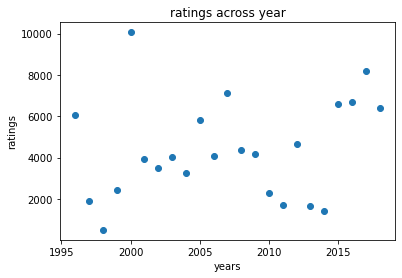

In [67]:
#now lets scatter plot

years=ratings_per_year.keys()
num_ratings=ratings_per_year.to_numpy()
plt.scatter(years,num_ratings)
plt.xlabel('years')
plt.ylabel("ratings")
plt.title('ratings across year')
plt.show()



In [68]:
#building a linear regression model

from scipy import stats
slope, intercept, r_value, p_value, std_err=stats.linregress(years, num_ratings)

In [69]:
print('generated_model is y= '+str(slope)+' '+'x'+' '+str(intercept))

generated_model is y= 72.05138339920947 x -140222.95256916992


In [70]:
def pred_fun(year):
    return slope*year+intercept
predicted_slope=pred_fun(years)

print(predicted_slope)

Float64Index([3591.6086956521904,  3663.660079051391,  3735.711462450592,
               3807.762845849822,  3879.814229249023, 3951.8656126482238,
              4023.9169960474246, 4095.9683794466546,  4168.019762845855,
               4240.071146245056,  4312.122529644286,  4384.173913043487,
               4456.225296442688,  4528.276679841889,  4600.328063241119,
                4672.37944664032, 4744.4308300395205, 4816.4822134387505,
               4888.533596837951,  4960.584980237152,  5032.636363636382,
               5104.687747035583,  5176.739130434784],
             dtype='float64', name='rating_year')


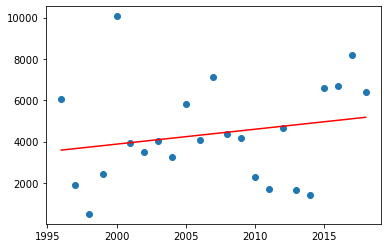

In [71]:
plt.scatter(years, num_ratings)
plt.plot(years,predicted_slope, c='r')
plt.show()

In [73]:
r_square=r_value**2
print("linear model's r square value is = "+str(r_square))

linear model's r square value is = 0.04081602216251049


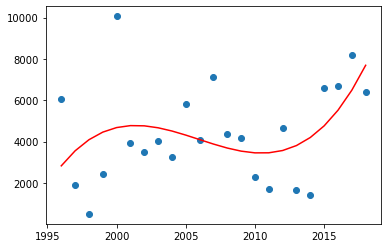

In [86]:
#lets try polynomial model
polynomial=np.poly1d(np.polyfit(years,num_ratings, 3))
plt.scatter(years, num_ratings)
plt.plot(years, polynomial(years), c='r')
plt.show()

In [85]:
#lets calculate polynomial r_square value

from sklearn.metrics import r2_score
r2=r2_score(num_ratings, polynomial(years))
print("r2 score of polynomial is = "+ str(r2))

r2 score of polynomial is = 0.23200365088214503
